In [97]:
import numpy as np
import pandas as pd
import seaborn as sns

In [98]:
data=pd.read_csv('/content/orders.csv', na_values=['Not Available', 'unknown'])

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9988 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [100]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [101]:
data.rename(columns={'Order Id':'Order_Id'})
data.columns=data.columns.str.replace(" ","_")


In [102]:
data.head()

,Order_Id,Order_Date,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Product_Id,cost_price,List_Price,Quantity,Discount_Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [103]:
data['Discount']=data['List_Price']*data['Discount_Percent']/100
data['Sale_Price']=data['List_Price']-data['Discount']
data['Profit']=data['Sale_Price']-data['cost_price']

In [104]:
data.head()

,Order_Id,Order_Date,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Product_Id,cost_price,List_Price,Quantity,Discount_Percent,Discount,Sale_Price,Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0


In [105]:
data['Order_Date']=pd.to_datetime(data['Order_Date'])

In [106]:
data.head()

,Order_Id,Order_Date,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Product_Id,cost_price,List_Price,Quantity,Discount_Percent,Discount,Sale_Price,Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0


In [107]:
data.drop(columns=['List_Price','cost_price','Discount_Percent'],inplace=True)

In [108]:
data.dtypes

Order_Id                 int64
Order_Date      datetime64[ns]
Ship_Mode               object
Segment                 object
Country                 object
City                    object
State                   object
Postal_Code              int64
Region                  object
Category                object
Sub_Category            object
Product_Id              object
Quantity                 int64
Discount               float64
Sale_Price             float64
Profit                 float64
dtype: object

In [109]:
# get the 10 product with highest sales
high_sales=data.groupby('Product_Id')['Sale_Price'].sum().nlargest(10)

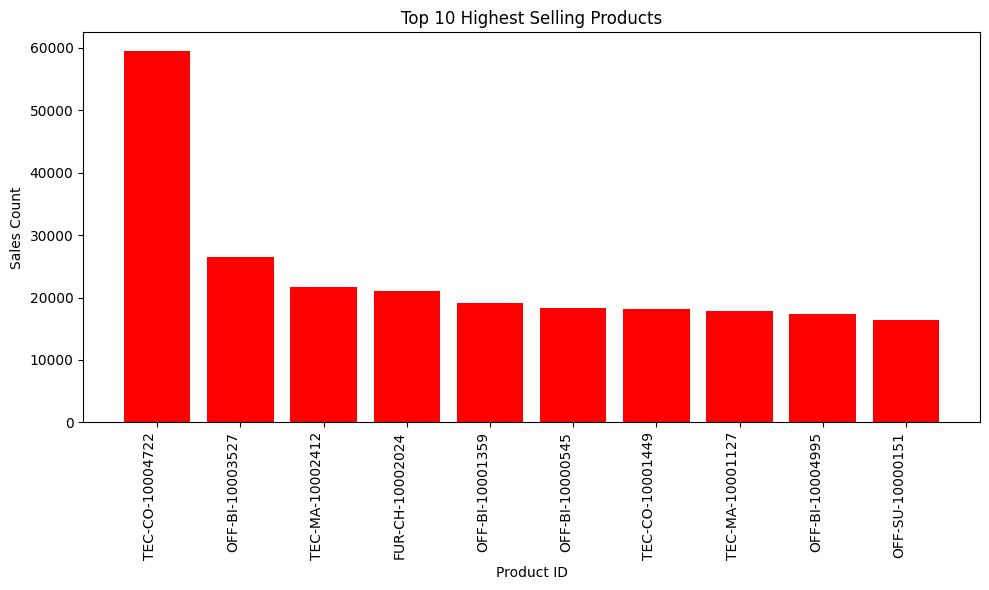

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(high_sales.index , high_sales.values ,color='red')
plt.xlabel('Product ID')
plt.ylabel('Sales Count')
plt.title('Top 10 Highest Selling Products')
plt.xticks(rotation='vertical', ha='right')
plt.tight_layout()
plt.show()

In [111]:
#top 5 highest selling product in each region
region_highest=data.groupby(['Product_Id','Region']).agg({'Sale_Price': 'sum'})
# Sort within groups and select top 5 products
top_products = region_highest.groupby('Region', group_keys=False).apply(lambda x: x.nlargest(5, 'Sale_Price'))
top_products


,,Sale_Price
Product_Id,Region,
TEC-CO-10004722,Central,16975.0
TEC-MA-10000822,Central,13770.0
OFF-BI-10001120,Central,11056.5
OFF-BI-10000545,Central,10132.7
OFF-BI-10004995,Central,8416.1
TEC-CO-10004722,East,29099.0
TEC-MA-10001047,East,13767.0
FUR-BO-10004834,East,11274.1
OFF-BI-10001359,East,8463.6


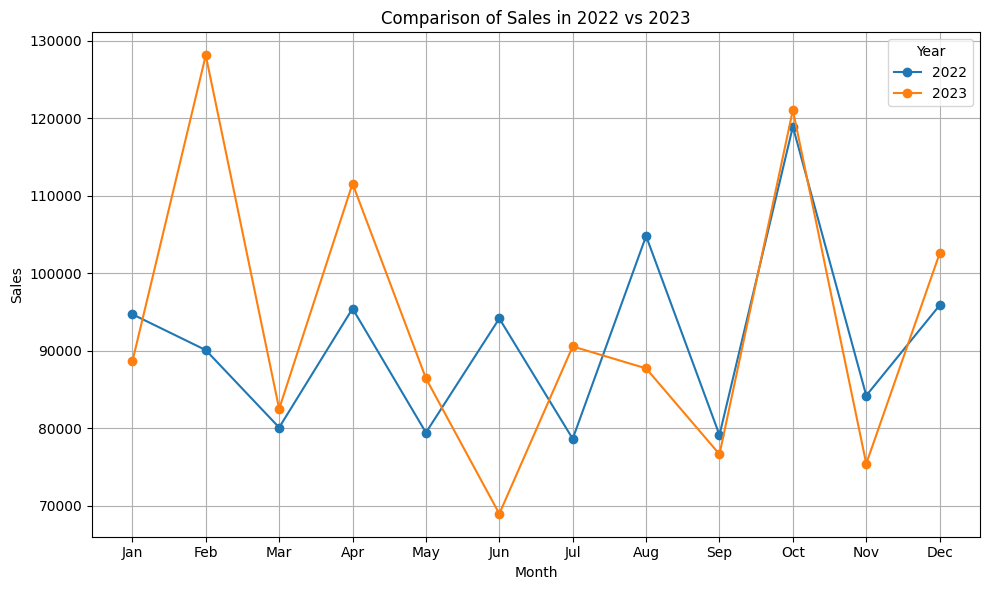

In [112]:
#YEAR WISE MONTH GrOWTH OF SALES 2022 VS 2023
data['Year']=data['Order_Date'].dt.year
data['Month']=data['Order_Date'].dt.month

# Group by year and month and sum the sales
sales_by_month = data.groupby(['Year', 'Month'])['Sale_Price'].sum()


# Plot the time series of sales for each year
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month.loc[2022], label='2022', marker='o')
plt.plot(sales_by_month.loc[2023], label='2023', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Comparison of Sales in 2022 vs 2023')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [136]:
#sub category which has a highest growth in 2023 compared to 2022
data_2022 = data[data['Year'] == 2022]
data_2023 = data[data['Year'] == 2023]

# Calculate profit for each subcategory in 2022 and 2023
profit_2022 = data_2022.groupby('Sub_Category')['Profit'].sum()
profit_2023 = data_2023.groupby('Sub_Category')['Profit'].sum()

# Calculate growth in profit for each subcategory
profit_growth = (profit_2023 - profit_2022) / profit_2022 * 100

# Find the subcategory with the highest growth
subcategory_highest_growth = profit_growth.idxmax()
highest_growth_value = profit_growth.max()

print("Subcategory with the highest growth in profit from 2022 to 2023:")
print("Subcategory:", subcategory_highest_growth)
print("Growth Percentage:", highest_growth_value)

Subcategory with the highest growth in profit from 2022 to 2023:
Subcategory: Machines
Growth Percentage: 50.189142920256245
